# 6-0本章重點與成果展示

# 6-1單日股市爬蟲

In [2]:
import requests

data_str = "20210201"#"20230818"

r = requests.get("https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=" + data_str + "&type=ALLBUT0999")

print(r.text)


"110年02月01日 價格指數(臺灣證券交易所)"
"指數","收盤指數","漲跌(+/-)","漲跌點數","漲跌百分比(%)","特殊處理註記",
"寶島股價指數","17,486.65","+","289.40","1.68","",
"發行量加權股價指數","15,410.09","+","271.78","1.80","",
"臺灣公司治理100指數","9,267.99","+","205.13","2.26","",
"臺灣50指數","13,062.70","+","314.60","2.47","",
"臺灣50權重上限30%指數","11,961.41","+","242.68","2.07","",
"臺灣中型100指數","10,753.20","+","87.72","0.82","",
"臺灣資訊科技指數","23,579.30","+","693.00","3.03","",
"臺灣發達指數","9,329.12","+","90.72","0.98","",
"臺灣高股息指數","7,040.50","+","24.07","0.34","",
"臺灣就業99指數","8,153.04","+","132.57","1.65","",
"臺灣高薪100指數","7,617.62","+","112.46","1.50","",
"未含金融指數","13,668.52","+","254.52","1.90","",
"未含電子指數","14,870.72","+","116.55","0.79","",
"未含金融電子指數","12,730.19","+","97.23","0.77","",
"小型股300指數","7,407.34","+","7.75","0.10","",
"水泥窯製類指數","598.81","+","7.86","1.33","",
"塑膠化工類指數","801.25","+","10.56","1.34","",
"機電類指數","4,438.05","+","96.63","2.23","",
"水泥類指數","160.93","+","2.03","1.28","",
"食品類指數","1,728.90","+","0.32","0.02","",
"塑膠類指數","240.19","+","3.1

# 6-2pandas套件

In [4]:
import pandas as pd
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
print(s)
s["a"]

a    1
b    2
c    3
d    4
e    5
dtype: int64


1

In [5]:
import pandas as pd
df = pd.DataFrame([[0, 1], [2, 3]])
df

,0,1
0,0,1
1,2,3


In [2]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], index = ["a", "b", "c"])
print(df.shape)
print(df.columns)
print(df.index)
print(df.head(2))
print(type(df[0]))
print(df.info())
print(df.drop(columns = 2))#index = ["c"]))
df

(3, 3)
RangeIndex(start=0, stop=3, step=1)
Index(['a', 'b', 'c'], dtype='object')
   0  1  2
a  1  2  3
b  4  5  6
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int64
 1   1       3 non-null      int64
 2   2       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes
None
   0  1
a  1  2
b  4  5
c  7  8


,0,1,2
a,1,2,3
b,4,5,6
c,7,8,9


In [5]:
from io import StringIO
s = ["A", "B", "C"]
print("\n".join(s))
"\n".join(s)

A
B
C


'A\nB\nC'

In [52]:
import requests
from io import StringIO
import pandas as pd

datastr = "20210201"
stock_symbol = "2330"

# r = requests.get("https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=" + data_str + "&type=ALLBUT0999")
r_text = r.text.split("\n")
r_text = [i for i in r_text if len(i.split('",')) == 17 and i[0] != "="]
data = "\n".join(r_text)

df = pd.read_csv(StringIO("\n".join(r_text)), header = 0)
df = df.drop(columns = "Unnamed: 16")
filter_df = df[df["證券代號"] == stock_symbol]
filter_df
# data
# r_text

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
276,2330,台積電,"70,161,939","81,346","42,004,241,697",595.00,612.00,587.00,611.00,+,20.0,610.00,237,611.00,475,32.26


In [21]:
import requests
from io import StringIO
import pandas as pd

datastr = "20230821"
stock_symbol = "00878"

# r = requests.get("https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=" + datastr + "&type=ALLBUT0999")
r_text = r.text.split("\n")
r_cleaned_text = [i for i in r_text if len(i.split('",')) == 17 and i[0] == "="]

df = pd.read_csv(StringIO("\n".join(r_cleaned_text)), header = None)
df = df.drop(columns = 16)
df.columns = ["證券代號","證券名稱","成交股數","成交筆數","成交金額","開盤價","最高價","最低價","收盤價","漲跌(+/-)",
              "漲跌價差","最後揭示買價","最後揭示買量","最後揭示賣價","最後揭示賣量","本益比"]

def myfun(x):
    return x.lstrip("=").strip('"')

# df["證券代號"] = df["證券代號"].map(myfun)

def myfun2(x):
    return x.lstrip("=").strip('"')
    

#df["證券代號"] = df["證券代號"].apply(myfun2)

df["證券代號"] = df["證券代號"].str.replace('="', "")
df["證券代號"] = df["證券代號"].str.replace('"', "")


filter_df = df[df["證券代號"] == stock_symbol]
filter_df

#filter_df.insert(0, "日期", "20230821")
#list(filter_df.iloc[0]), filter_df.columns

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
113,00878,國泰永續高股息,"49,399,932","21,343","1,043,382,300",21.16,21.30,21.00,21.06,+,0.01,21.06,257,21.07,171,0.0


# 6-3datetime套件

In [52]:
import datetime
date = datetime.datetime.strptime("20210308", "%Y%m%d")
print(date)
print(type(date))
date_str = date.strftime("%Y%m%d")
print(date_str)
print(type(date_str))

2021-03-08 00:00:00
<class 'datetime.datetime'>
20210308
<class 'str'>


In [62]:
datetime.datetime.today()
#datetime.datetime.today().date()

datetime.datetime(2023, 8, 21, 17, 42, 27, 948521)

In [70]:
import datetime
date = datetime.datetime.today().date().strftime("%Y%m%d")
date

'20230820'

In [75]:
import datetime
date = datetime.datetime.strptime("20210311", "%Y%m%d")
print(date.weekday())

3


In [39]:
import datetime
start_date = datetime.datetime.strptime("20210308", "%Y%m%d")
end_date = datetime.datetime.strptime("20210311", "%Y%m%d")
print((end_date - start_date).days)

3


In [41]:
datetime.timedelta(days = 2)

datetime.timedelta(days=2)

In [50]:
end_date - start_date

datetime.timedelta(days=4)

In [47]:
import datetime
start_date = datetime.datetime.strptime("20210227", "%Y%m%d")
end_date = datetime.datetime.strptime("20210303", "%Y%m%d")
days = (end_date - start_date).days
print(days)
print(start_date + datetime.timedelta(days = days))# +(end_date - start_date)也可以，因為都是TimeSpan物件

4
2021-03-03 00:00:00


In [65]:
import datetime
start_date_str = "20210125"
end_date_str = "20210201"

start_date = datetime.datetime.strptime(start_date_str, "%Y%m%d")
end_date = datetime.datetime.strptime(end_date_str, "%Y%m%d")

totaldays = (end_date - start_date).days + 1
dates = []
for daynumber in range(totaldays):
    date = (start_date + datetime.timedelta(days = daynumber))
    if date.weekday() < 6:
        dates.append(date.strftime("%Y%m%d"))
        
print(dates)

['20210125', '20210126', '20210127', '20210128', '20210129', '20210130', '20210201']


# 6-4檔案存取

In [82]:
f = open("a.txt", "w", encoding = "utf-8")
f.write("""白日依山盡
黃河入海流
欲求千里目
更上一層樓""")
f.close()
f = open("a.txt", "r", encoding = "UTF-8")
s = f.readlines()
print(s)
f.close()

['白日依山盡\n', '黃河入海流\n', '欲求千里目\n', '更上一層樓']


In [78]:
with open("a.txt", encoding = "utf-8") as f:
    print(f.read(5))#也可以用變數去assign

白日依山盡


In [90]:
def get_setting():
    res = []
    try:
        with open("stock.txt") as f:
            slist = f.readlines()
            print("讀入: ", slist)
            a, b, c = slist[0].split(",")
            res = [a, b, c]
    except:
        print("stock.txt 讀取錯誤")
    return res

stock = get_setting()
print("傳回: ", stock)

讀入:  ['2330,20201125,20210201']
傳回:  ['2330', '20201125', '20210201']


# 6-5實戰:股市爬蟲

In [ ]:
import requests
import pandas as pd
from io import StringIO
import datetime

def crawl_data(date, symbol):
    r = requests.get("https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=" + date + "&type=ALL")
    r_text = [i for i in r.text.split("\n") if len(i.split('",')) == 17 and i[0] != "="]
    df = pd.read_csv(StringIO("\n".join(r_text)), header = 0)
    
    df = df.drop(columns = "Unnamed: 16")
    filter_df = df[df["證券代號"] == symbol]
    filter_df.insert(0, "日期", date)
    return list(filter_df.iloc[0]), filter_df.columns

In [1]:
import crawler_module as m
from time import sleep
import pandas as pd

all_list = []
stock_symbol, dates = m.get_data()
#print(stock_symbol, dates)

for date in dates:
#     print(date)
    sleep(5)
    try:
        crawler_data = m.crawl_data(date, stock_symbol)
        #print(crawler_data)
        all_list.append(crawler_data[0])
        df_columns = crawler_data[1]
        print(" OK! date = " + date + " ,stock symbol = " + stock_symbol)
    except: #BaseException as e: 可用來抓錯
        print("error! date = " + date + " ,stock symbol = " + stock_symbol)
        #print(e)
        
all_df = pd.DataFrame(all_list, columns = df_columns)
all_df

讀入:  ['2330,20201125,20201205']
 OK! date = 20201125 ,stock symbol = 2330
 OK! date = 20201126 ,stock symbol = 2330
 OK! date = 20201127 ,stock symbol = 2330
error! date = 20201128 ,stock symbol = 2330
 OK! date = 20201130 ,stock symbol = 2330
 OK! date = 20201201 ,stock symbol = 2330
 OK! date = 20201202 ,stock symbol = 2330
 OK! date = 20201203 ,stock symbol = 2330
 OK! date = 20201204 ,stock symbol = 2330
error! date = 20201205 ,stock symbol = 2330


,日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,20201125,2330,台積電,"47,179,640","40,066","23,142,083,458",495.00,495.50,487.00,487.00,-,5.0,487.00,706,487.50,138,25.71
1,20201126,2330,台積電,"31,844,322","19,587","15,606,951,086",489.00,493.50,488.00,489.00,+,2.0,489.00,445,489.50,10,25.82
2,20201127,2330,台積電,"35,196,829","21,314","17,205,872,680",487.50,492.00,486.50,489.00,,0.0,489.00,130,489.50,55,25.82
3,20201130,2330,台積電,"149,311,778","49,362","72,095,050,187",493.00,493.50,480.50,480.50,-,8.5,480.50,"1,238",481.00,8,25.37
4,20201201,2330,台積電,"38,341,265","24,827","18,719,729,411",489.50,490.00,483.50,490.00,+,9.5,489.50,86,490.00,621,25.87
5,20201202,2330,台積電,"60,208,035","35,624","29,970,556,095",499.50,500.00,493.50,499.00,+,9.0,498.50,18,499.00,"1,187",26.35
6,20201203,2330,台積電,"36,919,644","25,651","18,369,786,608",499.50,499.50,495.00,497.00,-,2.0,496.50,24,497.00,156,26.24
7,20201204,2330,台積電,"54,471,042","35,708","27,307,472,890",498.50,505.00,497.50,503.00,+,6.0,503.00,126,504.00,462,26.56


# 6-6matplotlib套件

In [25]:
all_df["日期"].astype(str)

0    20201126
1    20201127
2    20201130
3    20201201
4    20201202
5    20201203
6    20201204
Name: 日期, dtype: object

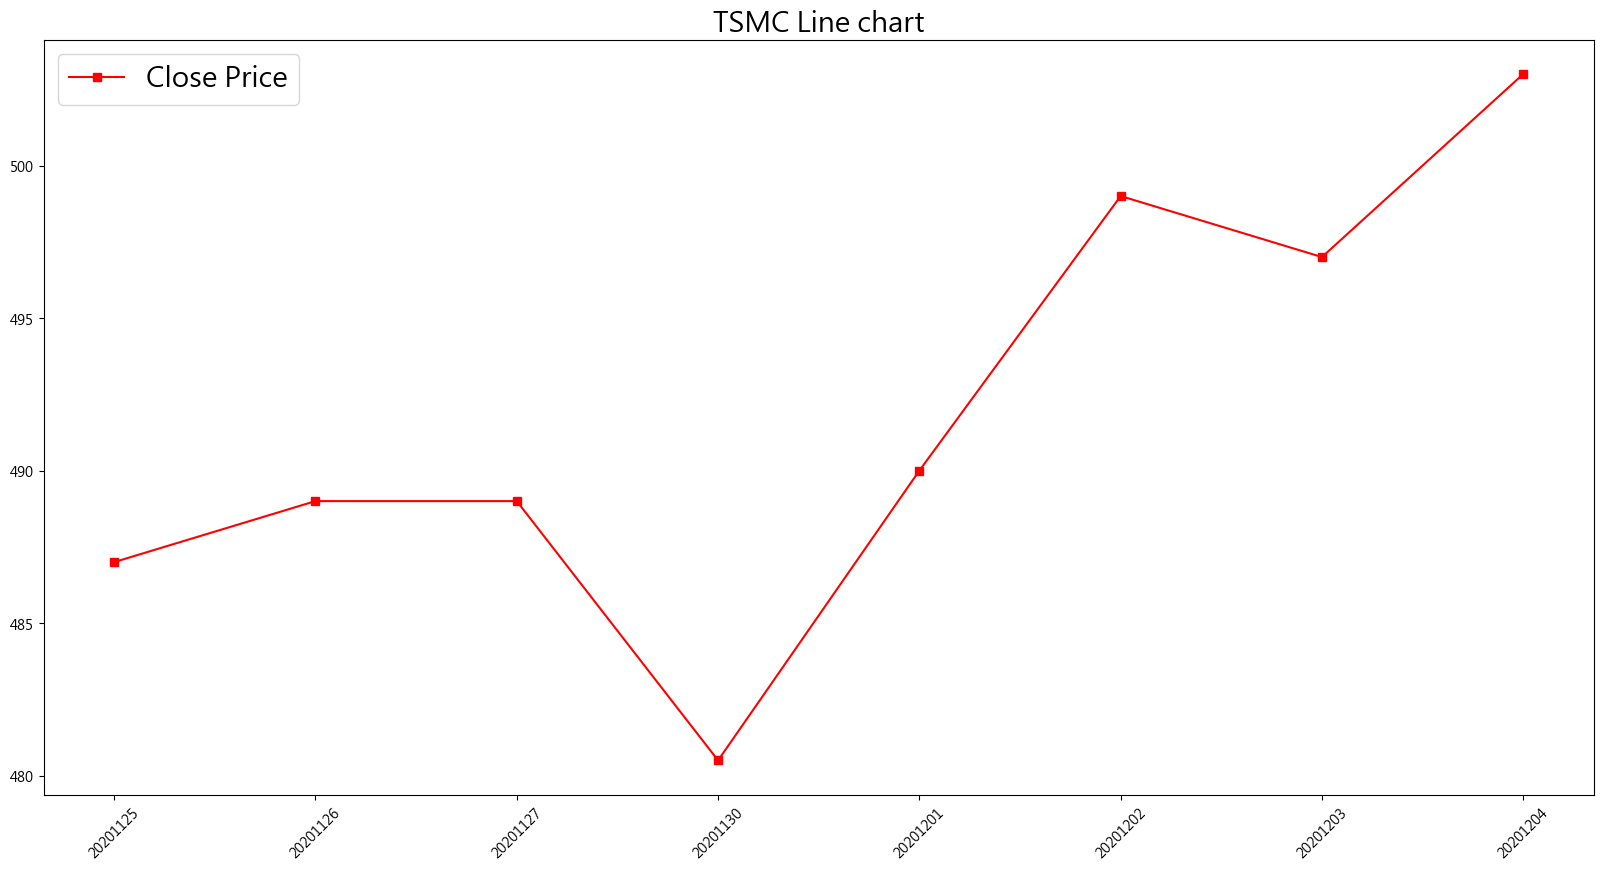

In [30]:
import matplotlib.pyplot as plt
import crawler_module as m
from time import sleep
import pandas as pd

# all_list = []
# stock_symbol, dates = m.get_data()

# for date in dates:
#     sleep(5)
#     try:
#         crawler_data = m.crawl_data(date, stock_symbol)
#         all_list.append(crawler_data[0])
#         df_columns = crawler_data[1]
#         print(" OK! date = " + date + " ,stock symbol = " + stock_symbol)
#     except:
#         print("error! date = " + date + " ,stock symbol = " + stock_symbol)
        
# all_df = pd.DataFrame(all_list, columns = df_columns)

day = all_df["日期"].astype(str)
close = all_df["收盤價"].astype(float)

plt.figure(figsize = (20, 10), dpi = 100)

plt.plot(day, close, "s-", color = "r", label = "Close Price")
plt.title("TSMC Line chart", fontsize = 20)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.legend(loc = "best", fontsize = 20)

plt.show()

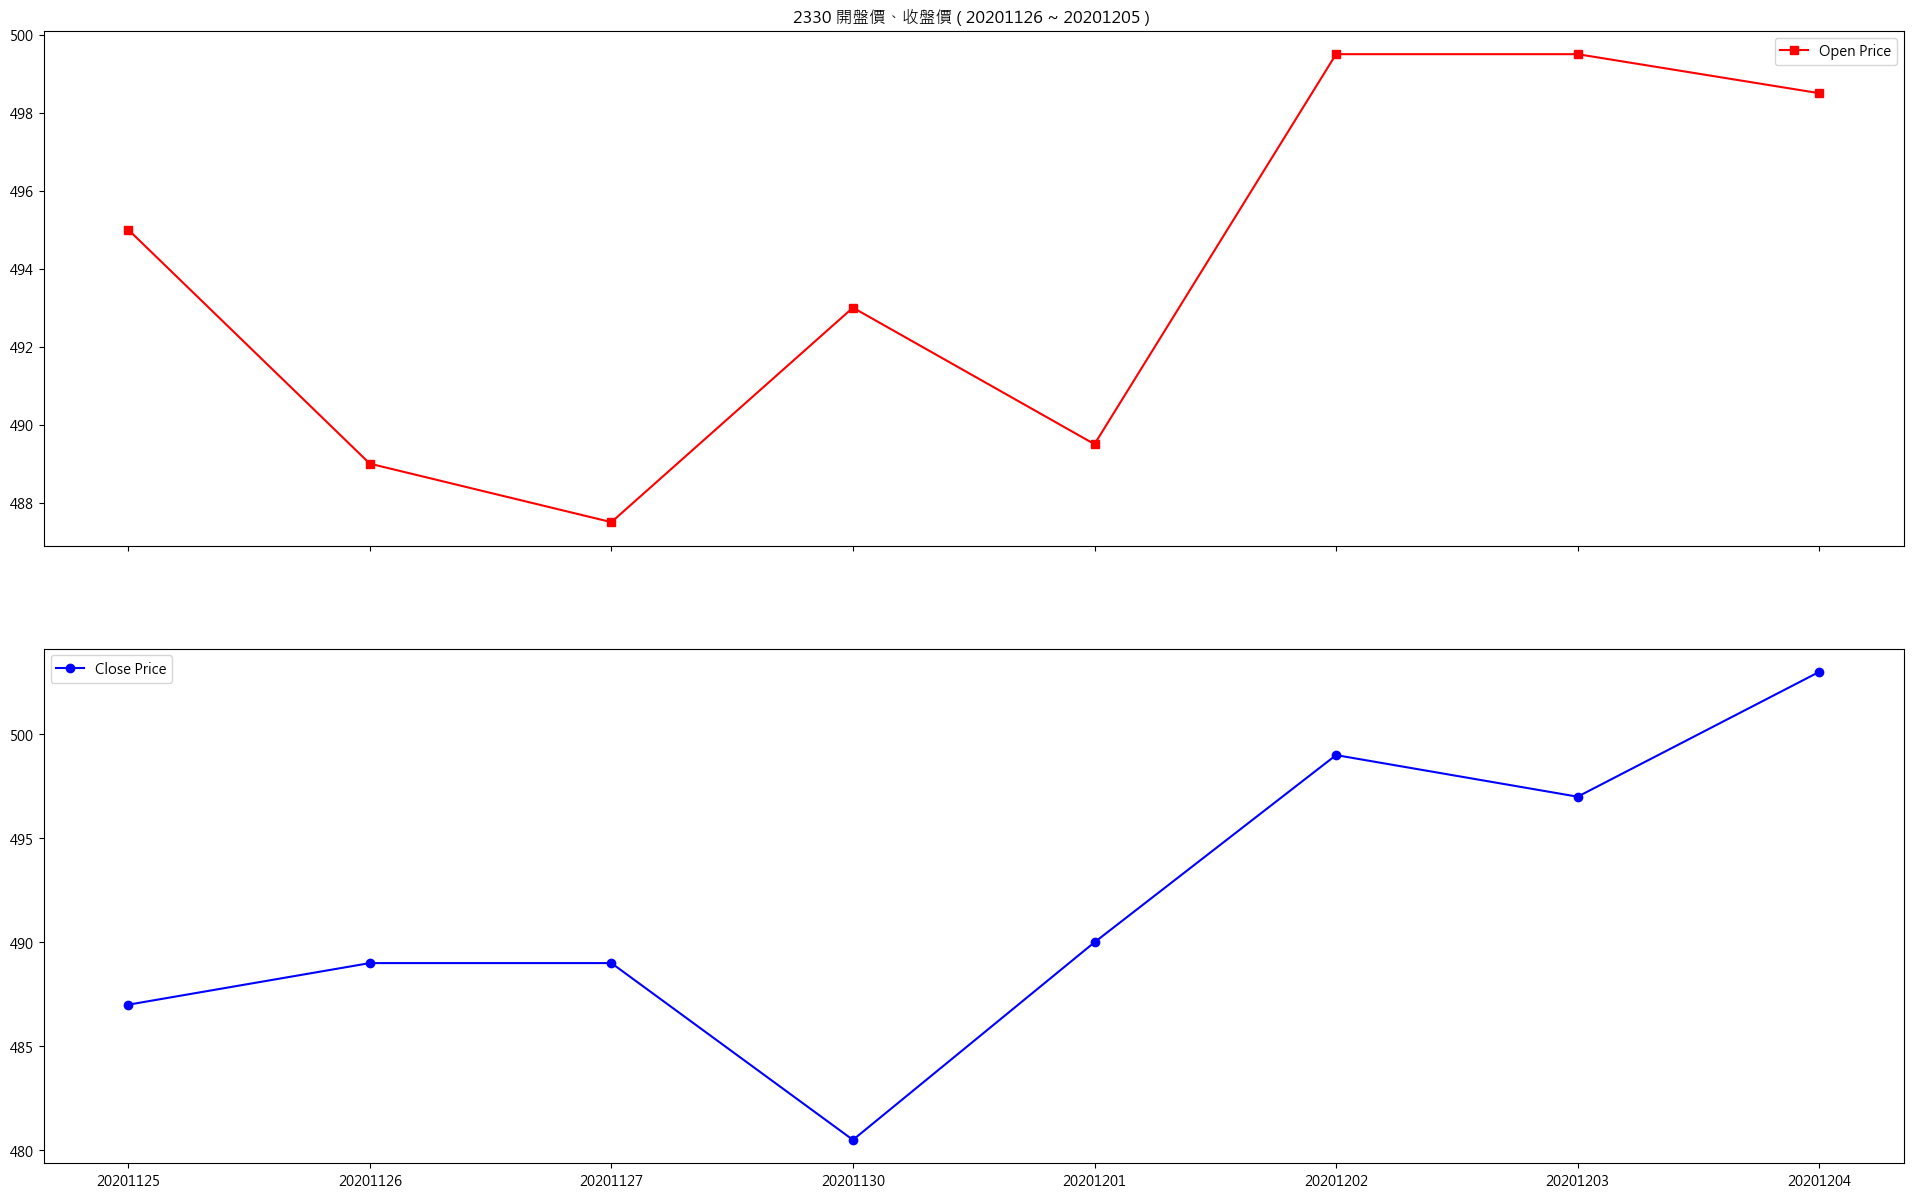

In [12]:
import matplotlib.pyplot as plt
import crawler_module as m
from time import sleep
import pandas as pd

# all_list = []
# stock_symbol, dates = m.get_data()

# for date in dates:
#     sleep(5)
#     try:
#         crawler_data = m.crawl_data(date, stock_symbol)
#         all_list.append(crawler_data[0])
#         df_columns = crawler_data[1]
#         print(" OK! date = " + date + " ,stock symbol = " + stock_symbol)
#     except:
#         print("error! date = " + date + " ,stock symbol = " + stock_symbol)
        
# all_df = pd.DataFrame(all_list, columns = df_columns)

day = all_df["日期"].astype(str)
openprice = all_df["開盤價"].astype(float)
close = all_df["收盤價"].astype(float)

fig, (ax, ax2) = plt.subplots(2, 1, sharex = True, figsize = (24, 15), dpi = 100)
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
ax.set_title(stock_symbol + " 開盤價、收盤價 ( " + dates[1] + " ~ " + dates[-1] + " ) ")

ax.plot(day, openprice, "s-", color = "r", label = "Open Price")
ax.legend(loc = 'best', fontsize = 10)

ax2.plot(day, close, "o-", color = "b", label = "Close Price")
ax2.legend(loc = "best", fontsize = 10)
ax2.set_xticks(range(0, len(day)))
ax2.set_xticklabels(day[:])

plt.show()

In [1]:
import crawler_module as m
from time import sleep
import pandas as pd



all_list = []
stock_symbol, dates = m.get_data()

for date in dates:
    sleep(5)
    try:
        crawler_data = m.crawl_data(date, stock_symbol)
        all_list.append(crawler_data[0])
        df_columns = crawler_data[1]
        print(" OK! date = " + date + " ,stock symbol = " + stock_symbol)
    except:
        print("error! date = " + date + " ,stock symbol = " + stock_symbol)
        
all_df = pd.DataFrame(all_list, columns = df_columns)

讀入:  ['2330,20201125,20201205']
 OK! date = 20201125 ,stock symbol = 2330
 OK! date = 20201126 ,stock symbol = 2330
 OK! date = 20201127 ,stock symbol = 2330
error! date = 20201128 ,stock symbol = 2330
 OK! date = 20201130 ,stock symbol = 2330
 OK! date = 20201201 ,stock symbol = 2330
 OK! date = 20201202 ,stock symbol = 2330
 OK! date = 20201203 ,stock symbol = 2330
 OK! date = 20201204 ,stock symbol = 2330
error! date = 20201205 ,stock symbol = 2330


In [2]:
all_df2 = all_df.copy()
all_df2

,日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,20201125,2330,台積電,"47,179,640","40,066","23,142,083,458",495.00,495.50,487.00,487.00,-,5.0,487.00,706,487.50,138,25.71
1,20201126,2330,台積電,"31,844,322","19,587","15,606,951,086",489.00,493.50,488.00,489.00,+,2.0,489.00,445,489.50,10,25.82
2,20201127,2330,台積電,"35,196,829","21,314","17,205,872,680",487.50,492.00,486.50,489.00,,0.0,489.00,130,489.50,55,25.82
3,20201130,2330,台積電,"149,311,778","49,362","72,095,050,187",493.00,493.50,480.50,480.50,-,8.5,480.50,"1,238",481.00,8,25.37
4,20201201,2330,台積電,"38,341,265","24,827","18,719,729,411",489.50,490.00,483.50,490.00,+,9.5,489.50,86,490.00,621,25.87
5,20201202,2330,台積電,"60,208,035","35,624","29,970,556,095",499.50,500.00,493.50,499.00,+,9.0,498.50,18,499.00,"1,187",26.35
6,20201203,2330,台積電,"36,919,644","25,651","18,369,786,608",499.50,499.50,495.00,497.00,-,2.0,496.50,24,497.00,156,26.24
7,20201204,2330,台積電,"54,471,042","35,708","27,307,472,890",498.50,505.00,497.50,503.00,+,6.0,503.00,126,504.00,462,26.56


In [1]:
string = "123,456"
string = string.replace(",", "")
string

'123456'

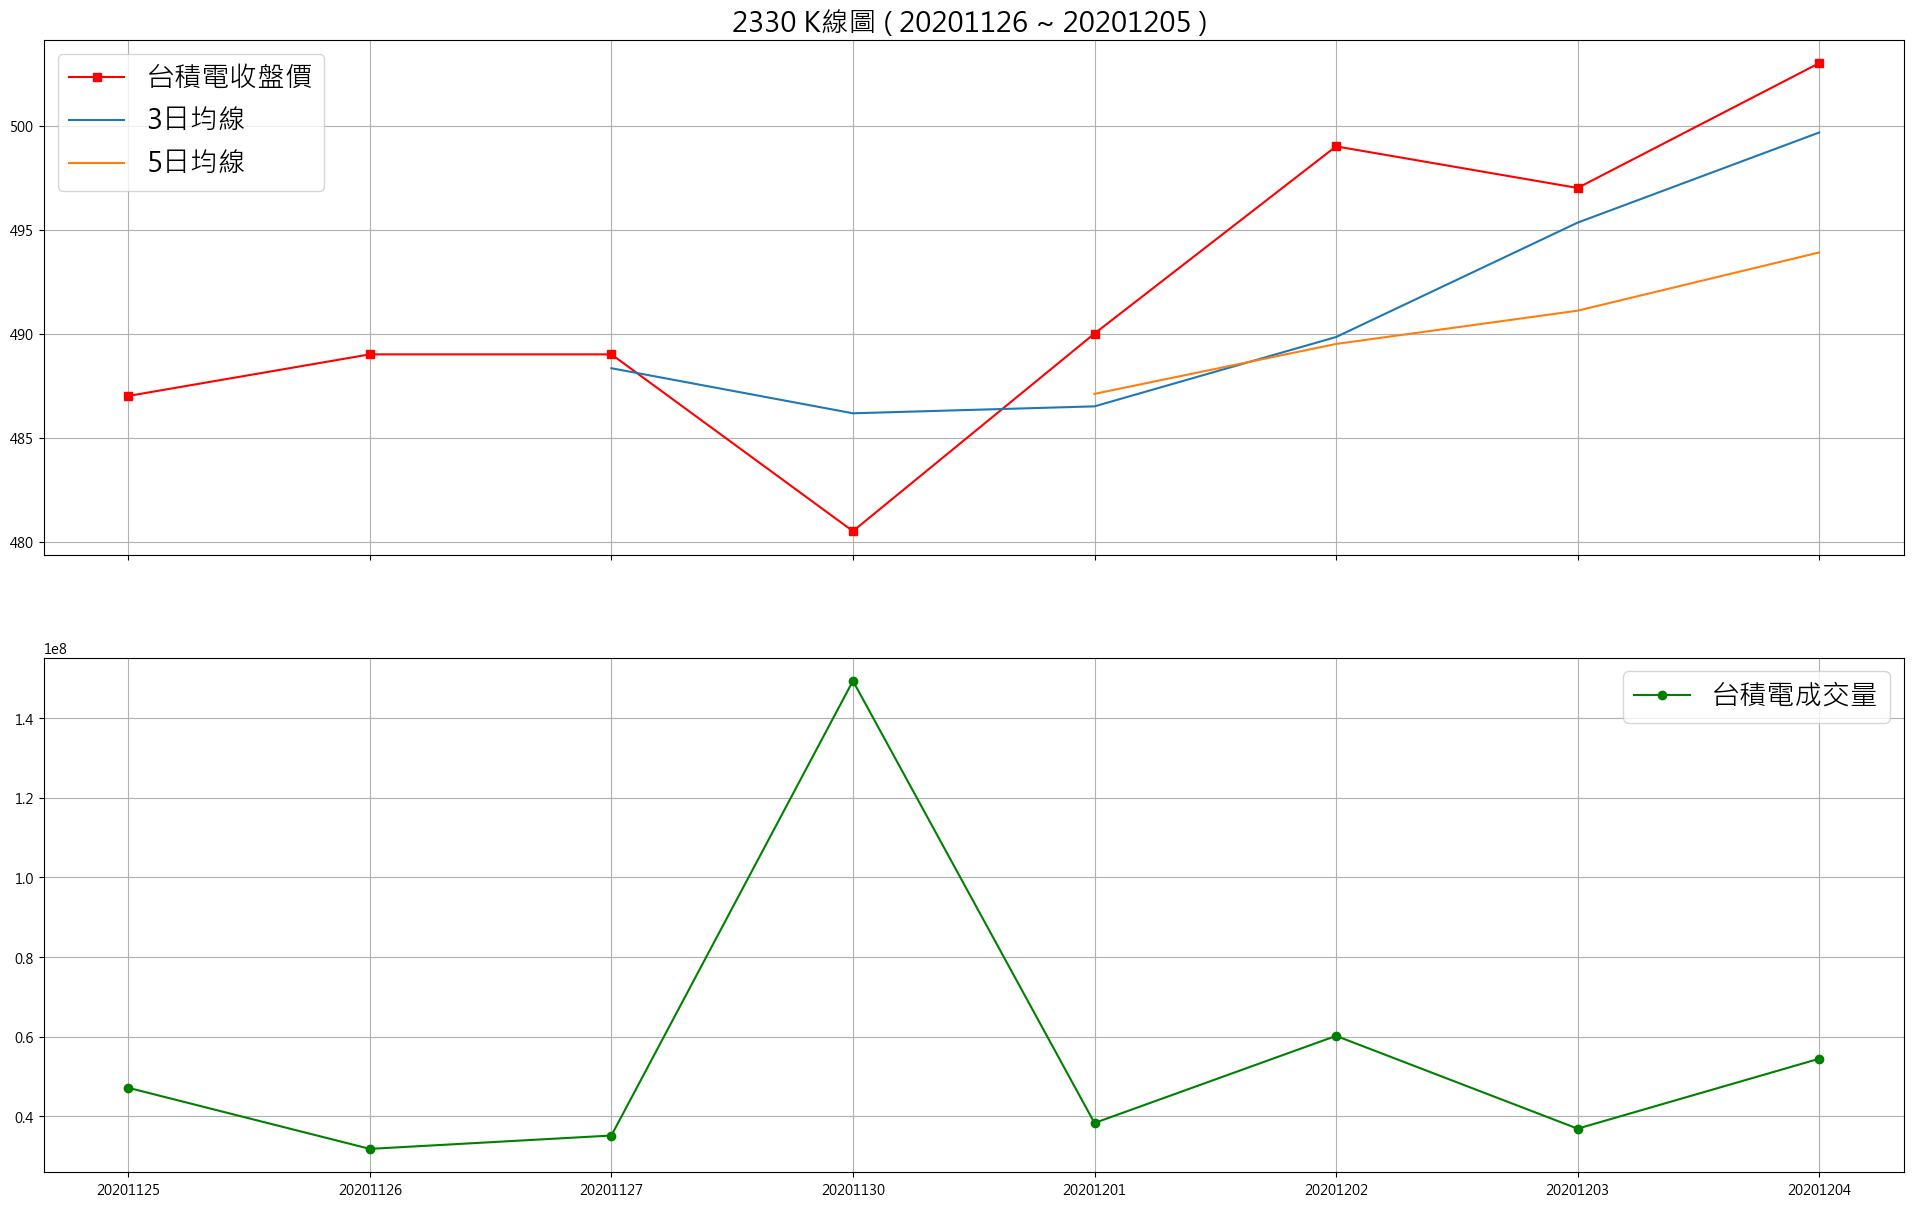

In [9]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import talib

#這些是series
day = all_df2["日期"].astype(str)
openprice = all_df2["開盤價"].astype(float)
close = all_df2["收盤價"].astype(float)
high = all_df2["最高價"].astype(float)
low = all_df2["最低價"].astype(float)
volume = all_df2["成交股數"].str.replace(",", "").astype(float)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (24, 15), dpi = 100)

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
ax1.set_title(stock_symbol + " K線圖 ( " + dates[1] + " ~ " + dates[-1] + " ) ", fontsize = 20)

ax1.plot(day, close, "s-", color = "r", label = "台積電收盤價")
ax1.plot(talib.SMA(close, 3), label = "3日均線")
ax1.plot(talib.SMA(close, 5), label = "5日均線")
ax1.legend(loc = "best", fontsize = 20)
ax1.grid(True)

ax2.plot(day, volume, "o-", color = "g", label = "台積電成交量")
ax2.legend(loc = "best", fontsize = 20)
ax2.set_xticks(range(len(day)))
ax2.set_xticklabels(day[:])
ax2.grid(True)

plt.show()

<class 'pandas.core.series.Series'>


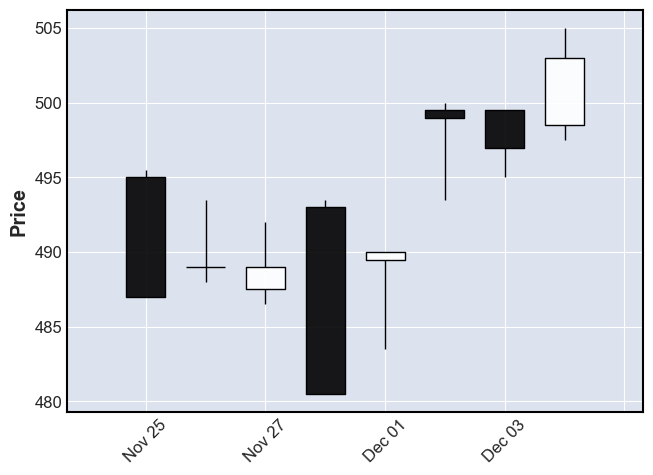

In [10]:
all_df2.columns = ["Date","證券代號","證券名稱","Volume","成交筆數","成交金額","Open","High","Low","Close","漲跌(+/-)",
              "漲跌價差","最後揭示買價","最後揭示買量","最後揭示賣價","最後揭示賣量","本益比"]
all_df2["Date"] = pd.to_datetime(all_df2["Date"])
#print(type(all_df2["Date"]))
all_df2 = all_df2.set_index("Date")
# all_df2 = all_df2.reset_index("Date")

def myfun1(x):
#     print(x)
#     print(",")
#     print(x)
    x = x.replace(",", "")
#     print(x)
    return x

def myfun2(x):
#     print(x.name)
#     print(",")
    all_df2[x.name] = pd.to_numeric(all_df2[x.name])
    
def myfun3(x):
#     print(x)
#     print(",")
    x = x.replace(",", "")
    return x



# all_df2["Volume"] = all_df2["Volume"].map(myfun1)#複習用apply降維試試看
all_df2["Volume"] = all_df2["Volume"].apply(myfun3)
all_df2[["Volume", "Open", "High", "Low", "Close"]].apply(myfun2, axis = 0)
mpf.plot(all_df2, type = "candle")# 蠟燭圖
# all_df2

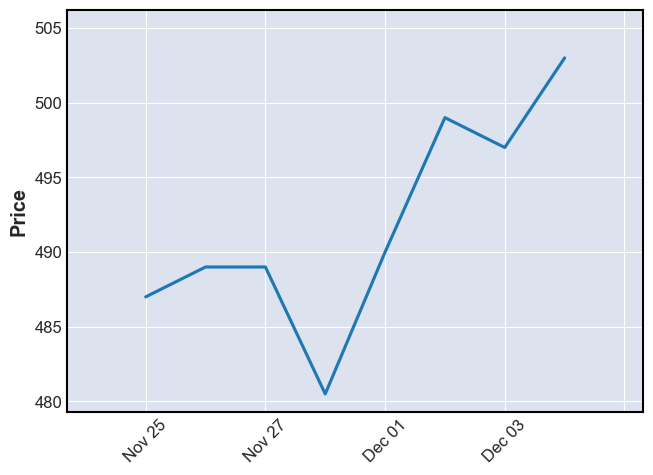

In [22]:
mpf.plot(all_df2, type = "line")# 線圖

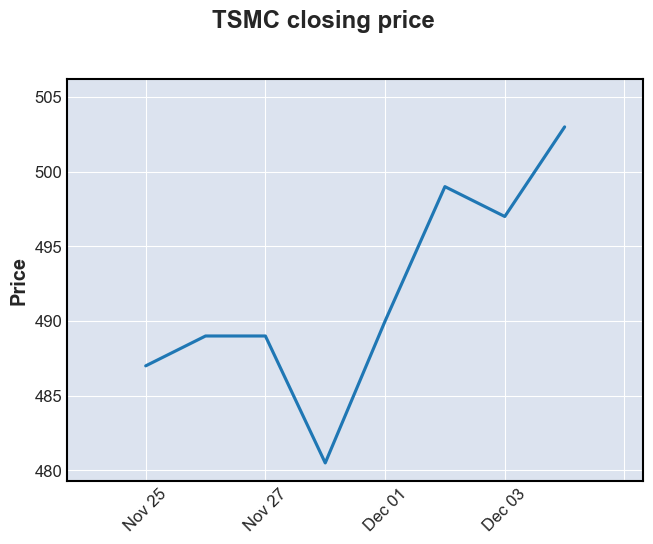

In [12]:
#利用 title 參數為圖表加上標題
mpf.plot(all_df2, type = "line", title = "TSMC closing price")

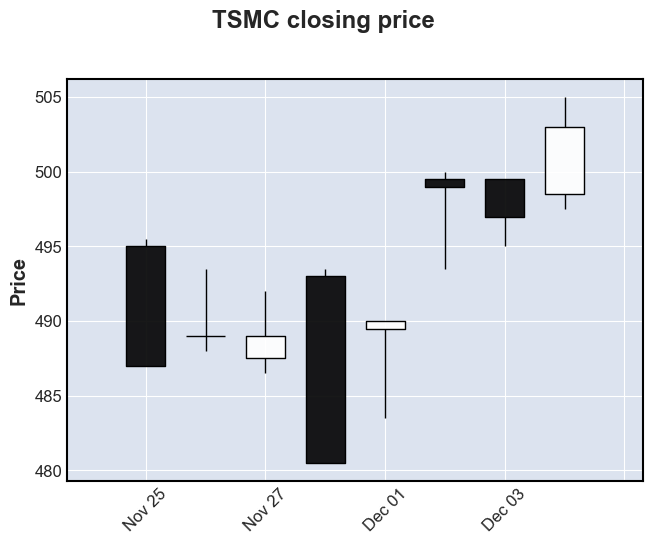

In [13]:
#不想立即打印圖表的話，也可以透過 block 參數控制
mpf.plot(all_df2, type = "candle", title = "TSMC closing price", block = False)
plt.show()# 手動打印

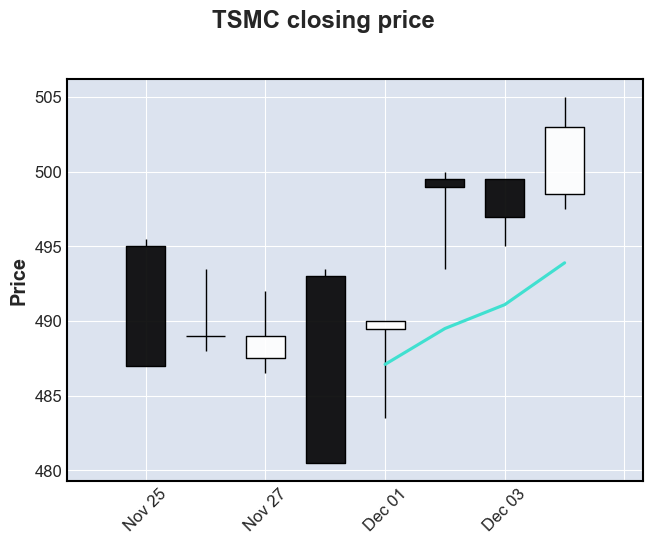

In [14]:
#可以通過 mav 這項參數直接在圖表上繪製均線，不須額外計算！
mpf.plot(all_df2, type = "candle", title = "TSMC closing price", mav = 5)

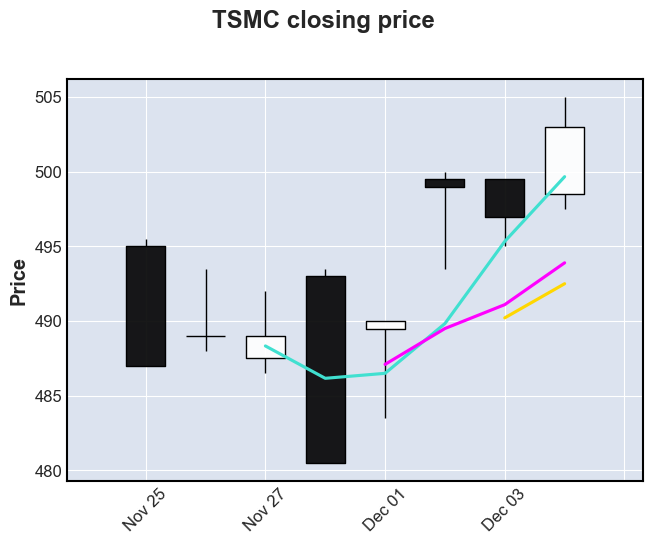

In [15]:
# 多組均線可以利用元組達成
mpf.plot(all_df2, type = "candle", title = "TSMC closing price", mav = (3, 5, 7))
plt.show()

# 增加指標

In [51]:
from talib import abstract

def DEMA(df, period):
    return abstract.DEMA(df, timeperiod = period)
def EMA(df, period):
    return abstract.EMA(df, timeperiod = period)
def SMA(df, period):
    return abstract.SMA(df, timeperiod = period)
def RSI(df, period):
    return abstract.RSI(df, timeperiod = period)

index = mpf.make_addplot(DEMA(all_df2, 3), panel = 1)
mpf.plot(all_df2, title = "Bitcoin Chart", type = "candle", addplot = [index])

TypeError: Argument 'real' has incorrect type (expected numpy.ndarray, got DataFrame)

# 增加成交量

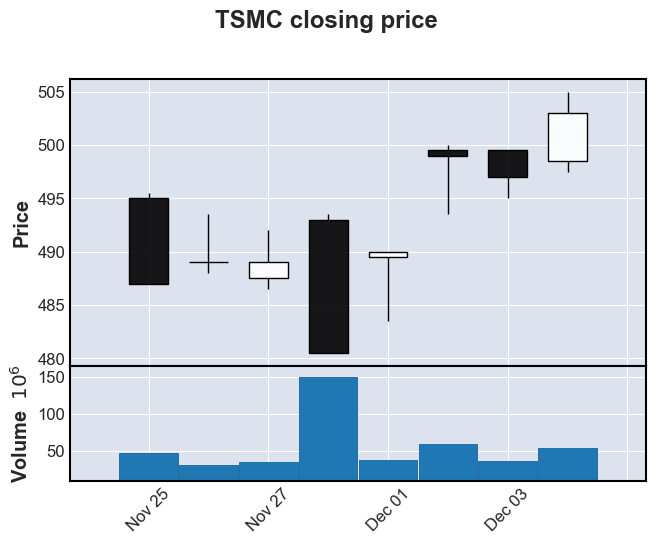

In [16]:
mpf.plot(all_df2, type = "candle", title = "TSMC closing price", volume = True)

In [61]:
# 可以利用打印輸出所有內建圖表風格
print(mpf.available_styles())

['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


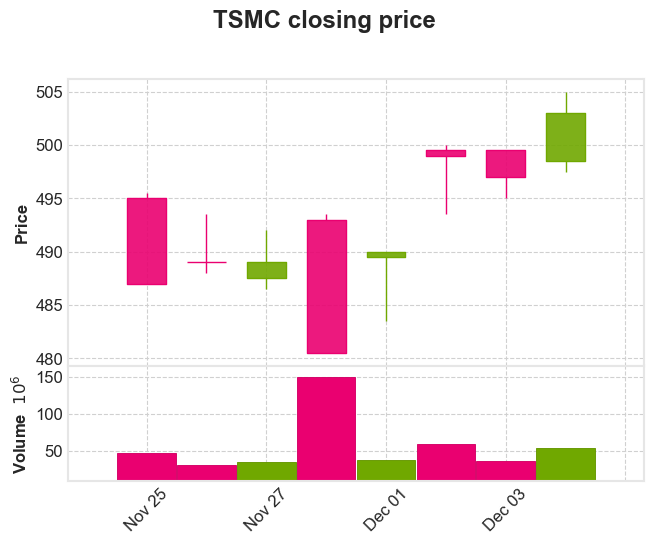

In [17]:
mpf.plot(all_df2, type = "candle", title = "TSMC closing price", volume = True, style = "binance")

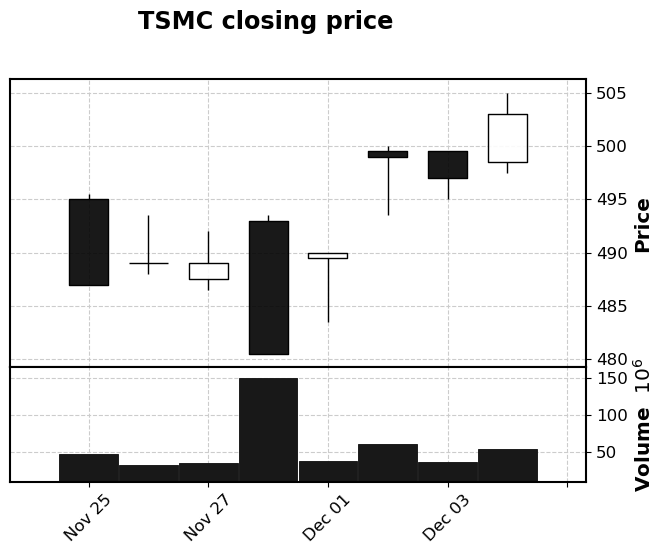

In [18]:
mpf.plot(all_df2, type = "candle", title = "TSMC closing price", volume = True, style = "classic")

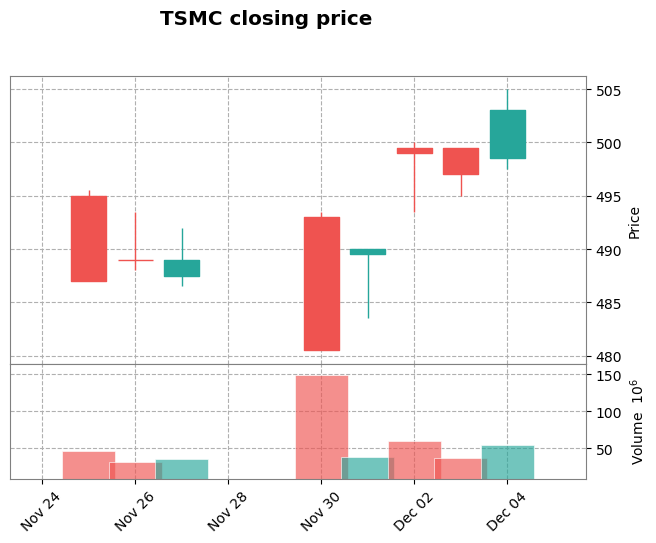

In [21]:
# show_nontrading 參數內建為 False
mpf.plot(all_df2, type = "candle", title = "TSMC closing price", volume = True, style = "tradingview", show_nontrading = True)

In [28]:
print(mpf.available_styles())

['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


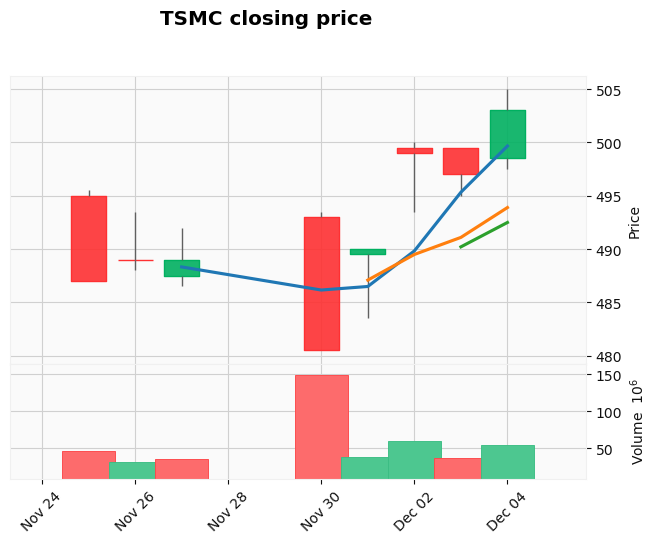

In [43]:
mpf.plot(all_df2, title = "TSMC closing price", type = "candle", style = "yahoo",mav = (3, 5, 7), volume = True, show_nontrading = True)